In [43]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta

In [2]:
def describe_categorical(X):
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [3]:
items = pd.read_csv('../Data Science/Bakery/g.csv')
items.head(10)

,Item,Flavor,Category,Price,Type
0,0,Chocolate,Cake,8.95,Food
1,1,Lemon,Cake,8.95,Food
2,2,Casino,Cake,15.95,Food
3,3,Opera,Cake,15.95,Food
4,4,Strawberry,Cake,11.95,Food
5,5,Truffle,Cake,15.95,Food
6,6,Chocolate,Eclair,3.25,Food
7,7,Coffee,Eclair,3.50,Food
8,8,Vanilla,Eclair,3.25,Food
9,9,Napoleon,Cake,13.49,Food


In [4]:
items.describe()

,Item,Price
count,50.00000,50.000000
mean,24.50000,3.784000
std,14.57738,4.060324
min,0.00000,0.790000
25%,12.25000,1.260000
50%,24.50000,2.600000
75%,36.75000,3.437500
max,49.00000,15.950000


In [5]:
describe_categorical(items)

,Flavor,Category,Type
count,50,50,50
unique,29,18,2
top,Chocolate,Tart,Food
freq,6,10,40


In [6]:
receipt = pd.read_csv('../Data Science/Bakery/r.csv')
receipt.head(10)

,ReceiptNumber,Date,Weekend,Cash,Employee,StoreNum
0,1,'12-JAN-2000','False','False',20,20
1,2,'15-JAN-2000','True','False',35,10
2,3,'8-JAN-2000','True','False',13,13
3,4,'24-JAN-2000','False','True',16,16
4,5,'22-JAN-2000','True','False',7,7
5,6,'28-JAN-2000','True','True',14,14
6,7,'1-JAN-2000','True','False',14,14
7,8,'9-JAN-2000','False','False',18,18
8,9,'21-SEP-2000','False','False',22,1
9,10,'18-JAN-2000','False','False',2,2


In [7]:
receipt.describe()

,ReceiptNumber,Employee,StoreNum
count,75000.000000,75000.000000,75000.000000
mean,37500.500000,19.345373,10.509653
std,21650.779432,13.353255,5.778900
min,1.000000,1.000000,1.000000
25%,18750.750000,9.000000,5.000000
50%,37500.500000,16.000000,11.000000
75%,56250.250000,27.000000,16.000000
max,75000.000000,50.000000,20.000000


In [8]:
describe_categorical(receipt)

,Date,Weekend,Cash
count,75000,75000,75000
unique,348,2,2
top,'26-JAN-2000','False','False'
freq,2529,51663,49935


In [9]:
location = pd.read_csv('../Data Science/Bakery/l.csv')
location.head(10)

,City,State,Zip,Street,StoreNum
0,San Francisco,CA,94171,150 Hayes St,1
1,San Luis Obispo,CA,93405,1430 Chorro St,2
2,Los Angeles,CA,90081,400 Lincoln Ave,3
3,Los Angeles,CA,90001,800 Olympic Blvd,4
4,Los Angeles,CA,90001,200 Olive St,5
5,San Diego,CA,92110,1507 Front St,6
6,San Jose,CA,95106,200 Keyes St,7
7,Santa Barbara,CA,93108,1337 Anacapa St,8
8,Monterey,CA,93943,730 Park Ave,9
9,Bakersfield,CA,93308,1850 Truxtun Ave,10


In [10]:
location.describe()

,Zip,StoreNum
count,20.000000,20.00000
mean,92190.550000,10.50000
std,3941.236748,5.91608
min,85016.000000,1.00000
25%,89877.500000,5.75000
50%,93208.000000,10.50000
75%,94434.750000,15.25000
max,98512.000000,20.00000


In [11]:
describe_categorical(location)

,City,State,Street
count,20,20,20
unique,18,5,20
top,Los Angeles,CA,300 Oak St
freq,3,12,1


In [12]:
df = pd.read_csv('../Data Science/Bakery/i.csv')
df.head(10)

,ReceiptNumber,Qty,Item
0,1,1,21
1,1,5,11
2,2,1,7
3,2,3,11
4,2,4,37
5,2,3,45
6,3,5,3
7,3,3,42
8,3,3,33
9,4,1,5


In [13]:
df.describe()

,ReceiptNumber,Qty,Item
count,266209.000000,266209.000000,266209.000000
mean,37506.447599,3.000462,24.282335
std,21665.459090,1.413553,14.771318
min,1.000000,1.000000,0.000000
25%,18732.000000,2.000000,11.000000
50%,37485.000000,3.000000,24.000000
75%,56260.000000,4.000000,37.000000
max,75000.000000,5.000000,49.000000


In [14]:
data = pd.merge(df, receipt, on='ReceiptNumber')
data.head(10)

,ReceiptNumber,Qty,Item,Date,Weekend,Cash,Employee,StoreNum
0,1,1,21,'12-JAN-2000','False','False',20,20
1,1,5,11,'12-JAN-2000','False','False',20,20
2,2,1,7,'15-JAN-2000','True','False',35,10
3,2,3,11,'15-JAN-2000','True','False',35,10
4,2,4,37,'15-JAN-2000','True','False',35,10
5,2,3,45,'15-JAN-2000','True','False',35,10
6,3,5,3,'8-JAN-2000','True','False',13,13
7,3,3,42,'8-JAN-2000','True','False',13,13
8,3,3,33,'8-JAN-2000','True','False',13,13
9,4,1,5,'24-JAN-2000','False','True',16,16


In [15]:
data['Weekend'] = pd.factorize(data['Weekend'])[0]
data['Cash'] = pd.factorize(data['Cash'])[0]
data.head(10)

,ReceiptNumber,Qty,Item,Date,Weekend,Cash,Employee,StoreNum
0,1,1,21,'12-JAN-2000',0,0,20,20
1,1,5,11,'12-JAN-2000',0,0,20,20
2,2,1,7,'15-JAN-2000',1,0,35,10
3,2,3,11,'15-JAN-2000',1,0,35,10
4,2,4,37,'15-JAN-2000',1,0,35,10
5,2,3,45,'15-JAN-2000',1,0,35,10
6,3,5,3,'8-JAN-2000',1,0,13,13
7,3,3,42,'8-JAN-2000',1,0,13,13
8,3,3,33,'8-JAN-2000',1,0,13,13
9,4,1,5,'24-JAN-2000',0,1,16,16


In [16]:
data['Date'] = pd.to_datetime(data['Date']) 
data.head(10)

,ReceiptNumber,Qty,Item,Date,Weekend,Cash,Employee,StoreNum
0,1,1,21,2000-01-12,0,0,20,20
1,1,5,11,2000-01-12,0,0,20,20
2,2,1,7,2000-01-15,1,0,35,10
3,2,3,11,2000-01-15,1,0,35,10
4,2,4,37,2000-01-15,1,0,35,10
5,2,3,45,2000-01-15,1,0,35,10
6,3,5,3,2000-01-08,1,0,13,13
7,3,3,42,2000-01-08,1,0,13,13
8,3,3,33,2000-01-08,1,0,13,13
9,4,1,5,2000-01-24,0,1,16,16


In [17]:
def extract_month(a):
    year,month,date=str(a).split('-')
    return month

In [18]:
data['Month'] = data['Date'].apply(extract_month)
data['Month'] = data['Month'].apply(int)
data.head(10)

,ReceiptNumber,Qty,Item,Date,Weekend,Cash,Employee,StoreNum,Month
0,1,1,21,2000-01-12,0,0,20,20,1
1,1,5,11,2000-01-12,0,0,20,20,1
2,2,1,7,2000-01-15,1,0,35,10,1
3,2,3,11,2000-01-15,1,0,35,10,1
4,2,4,37,2000-01-15,1,0,35,10,1
5,2,3,45,2000-01-15,1,0,35,10,1
6,3,5,3,2000-01-08,1,0,13,13,1
7,3,3,42,2000-01-08,1,0,13,13,1
8,3,3,33,2000-01-08,1,0,13,13,1
9,4,1,5,2000-01-24,0,1,16,16,1


In [19]:
data.drop(['ReceiptNumber', 'Employee'], axis=1, inplace=True)

In [20]:
data.head(10)

,Qty,Item,Date,Weekend,Cash,StoreNum,Month
0,1,21,2000-01-12,0,0,20,1
1,5,11,2000-01-12,0,0,20,1
2,1,7,2000-01-15,1,0,10,1
3,3,11,2000-01-15,1,0,10,1
4,4,37,2000-01-15,1,0,10,1
5,3,45,2000-01-15,1,0,10,1
6,5,3,2000-01-08,1,0,13,1
7,3,42,2000-01-08,1,0,13,1
8,3,33,2000-01-08,1,0,13,1
9,1,5,2000-01-24,0,1,16,1


In [21]:
data = pd.merge(data, location, on='StoreNum')
data.head(10)

,Qty,Item,Date,Weekend,Cash,StoreNum,Month,City,State,Zip,Street
0,1,21,2000-01-12,0,0,20,1,Tucson,AZ,85701,1900 Speedway Blvd
1,5,11,2000-01-12,0,0,20,1,Tucson,AZ,85701,1900 Speedway Blvd
2,1,36,2000-01-11,0,0,20,1,Tucson,AZ,85701,1900 Speedway Blvd
3,1,6,2000-01-11,0,0,20,1,Tucson,AZ,85701,1900 Speedway Blvd
4,2,5,2000-01-01,1,0,20,1,Tucson,AZ,85701,1900 Speedway Blvd
5,4,36,2000-01-01,1,0,20,1,Tucson,AZ,85701,1900 Speedway Blvd
6,5,2,2000-01-01,1,0,20,1,Tucson,AZ,85701,1900 Speedway Blvd
7,3,28,2000-01-01,1,0,20,1,Tucson,AZ,85701,1900 Speedway Blvd
8,1,12,2000-01-01,1,0,20,1,Tucson,AZ,85701,1900 Speedway Blvd
9,5,17,2000-01-05,0,0,20,1,Tucson,AZ,85701,1900 Speedway Blvd


In [22]:
data['City'] = pd.factorize(data['City'])[0]
data['State'] = pd.factorize(data['State'])[0]
data['Zip'] = pd.factorize(data['Zip'])[0]

In [23]:
data.drop(['Street', 'Cash'], axis=1, inplace=True)

In [24]:
data.head(10)

,Qty,Item,Date,Weekend,StoreNum,Month,City,State,Zip
0,1,21,2000-01-12,0,20,1,0,0,0
1,5,11,2000-01-12,0,20,1,0,0,0
2,1,36,2000-01-11,0,20,1,0,0,0
3,1,6,2000-01-11,0,20,1,0,0,0
4,2,5,2000-01-01,1,20,1,0,0,0
5,4,36,2000-01-01,1,20,1,0,0,0
6,5,2,2000-01-01,1,20,1,0,0,0
7,3,28,2000-01-01,1,20,1,0,0,0
8,1,12,2000-01-01,1,20,1,0,0,0
9,5,17,2000-01-05,0,20,1,0,0,0


In [25]:
data = pd.merge(data, items, on='Item')
data.head(10)

,Qty,Item,Date,Weekend,StoreNum,Month,City,State,Zip,Flavor,Category,Price,Type
0,1,21,2000-01-12,0,20,1,0,0,0,Ganache,Cookie,1.15,Food
1,4,21,2000-01-25,0,20,1,0,0,0,Ganache,Cookie,1.15,Food
2,4,21,2000-01-26,0,20,1,0,0,0,Ganache,Cookie,1.15,Food
3,3,21,2000-01-18,0,20,1,0,0,0,Ganache,Cookie,1.15,Food
4,1,21,2000-01-10,0,20,1,0,0,0,Ganache,Cookie,1.15,Food
5,4,21,2000-01-09,0,20,1,0,0,0,Ganache,Cookie,1.15,Food
6,3,21,2000-01-10,0,20,1,0,0,0,Ganache,Cookie,1.15,Food
7,5,21,2000-01-09,0,20,1,0,0,0,Ganache,Cookie,1.15,Food
8,1,21,2000-01-01,1,20,1,0,0,0,Ganache,Cookie,1.15,Food
9,4,21,2000-01-08,1,20,1,0,0,0,Ganache,Cookie,1.15,Food


In [26]:
data['Flavor'] = pd.factorize(data['Flavor'])[0]
data['Category'] = pd.factorize(data['Category'])[0]
data['Type'] = pd.factorize(data['Type'])[0]

In [27]:
data.drop('Price', axis=1, inplace=True)

In [28]:
data.head(10)

,Qty,Item,Date,Weekend,StoreNum,Month,City,State,Zip,Flavor,Category,Type
0,1,21,2000-01-12,0,20,1,0,0,0,0,0,0
1,4,21,2000-01-25,0,20,1,0,0,0,0,0,0
2,4,21,2000-01-26,0,20,1,0,0,0,0,0,0
3,3,21,2000-01-18,0,20,1,0,0,0,0,0,0
4,1,21,2000-01-10,0,20,1,0,0,0,0,0,0
5,4,21,2000-01-09,0,20,1,0,0,0,0,0,0
6,3,21,2000-01-10,0,20,1,0,0,0,0,0,0
7,5,21,2000-01-09,0,20,1,0,0,0,0,0,0
8,1,21,2000-01-01,1,20,1,0,0,0,0,0,0
9,4,21,2000-01-08,1,20,1,0,0,0,0,0,0


In [29]:
data.describe()

,Qty,Item,Weekend,StoreNum,Month,City,State,Zip,Flavor,Category,Type
count,266209.000000,266209.000000,266209.000000,266209.000000,266209.000000,266209.000000,266209.000000,266209.000000,266209.000000,266209.000000,266209.000000
mean,3.000462,24.282335,0.311503,10.509175,1.281069,8.744096,1.403078,9.091552,12.073942,6.026273,0.213697
std,1.413553,14.771318,0.463109,5.772631,1.450928,4.990398,1.160139,5.366403,8.056512,4.720419,0.409916
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,11.000000,0.000000,6.000000,1.000000,4.000000,1.000000,4.000000,5.000000,3.000000,0.000000
50%,3.000000,24.000000,0.000000,11.000000,1.000000,9.000000,1.000000,9.000000,11.000000,5.000000,0.000000
75%,4.000000,37.000000,1.000000,16.000000,1.000000,13.000000,2.000000,14.000000,18.000000,9.000000,0.000000
max,5.000000,49.000000,1.000000,20.000000,12.000000,17.000000,4.000000,18.000000,28.000000,17.000000,1.000000


In [37]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

pysqldf("SELECT * FROM data ORDER BY Date, StoreNum, Item").head(50)

,Qty,Item,Date,Weekend,StoreNum,Month,City,State,Zip,Flavor,Category,Type
0,2,0,2000-01-01 00:00:00.000000,1,1,1,7,1,7,2,4,0
1,1,2,2000-01-01 00:00:00.000000,1,1,1,7,1,7,4,4,0
2,1,4,2000-01-01 00:00:00.000000,1,1,1,7,1,7,11,4,0
3,5,5,2000-01-01 00:00:00.000000,1,1,1,7,1,7,3,4,0
4,5,6,2000-01-01 00:00:00.000000,1,1,1,7,1,7,2,3,0
5,5,7,2000-01-01 00:00:00.000000,1,1,1,7,1,7,21,3,0
6,3,7,2000-01-01 00:00:00.000000,1,1,1,7,1,7,21,3,0
7,5,7,2000-01-01 00:00:00.000000,1,1,1,7,1,7,21,3,0
8,2,8,2000-01-01 00:00:00.000000,1,1,1,7,1,7,6,3,0
9,5,9,2000-01-01 00:00:00.000000,1,1,1,7,1,7,12,4,0


In [42]:
target = pysqldf("SELECT Date, StoreNum, Item, Weekend, SUM(Qty) as Qty FROM data GROUP BY Date, StoreNum, Item")
target.head(20)

,Date,StoreNum,Item,Weekend,Qty
0,2000-01-01 00:00:00.000000,1,0,1,2
1,2000-01-01 00:00:00.000000,1,2,1,1
2,2000-01-01 00:00:00.000000,1,4,1,1
3,2000-01-01 00:00:00.000000,1,5,1,5
4,2000-01-01 00:00:00.000000,1,6,1,5
5,2000-01-01 00:00:00.000000,1,7,1,13
6,2000-01-01 00:00:00.000000,1,8,1,2
7,2000-01-01 00:00:00.000000,1,9,1,5
8,2000-01-01 00:00:00.000000,1,10,1,1
9,2000-01-01 00:00:00.000000,1,11,1,9


In [99]:
def date_add(d, n_day):
    res = d + timedelta(days=n_day)
    return res

In [105]:
lag1 = target.copy()
lag1.drop('Weekend', axis=1, inplace=True)
lag1['Date'] = lag1['Date'].apply(date_add, n_day=1)
lag1.head(10)

,Date,StoreNum,Item,Qty
0,2000-01-02,1,0,2
1,2000-01-02,1,2,1
2,2000-01-02,1,4,1
3,2000-01-02,1,5,5
4,2000-01-02,1,6,5
5,2000-01-02,1,7,13
6,2000-01-02,1,8,2
7,2000-01-02,1,9,5
8,2000-01-02,1,10,1
9,2000-01-02,1,11,9


In [107]:
lag2 = target.copy()
lag2.drop('Weekend', axis=1, inplace=True)
lag2['Date'] = lag2['Date'].apply(date_add, n_day=2)
lag3 = target.copy()
lag3.drop('Weekend', axis=1, inplace=True)
lag3['Date'] = lag3['Date'].apply(date_add, n_day=3)

In [108]:
lag1.rename(columns={'Qty': 'lag1'}, inplace=True)
lag2.rename(columns={'Qty': 'lag2'}, inplace=True)
lag3.rename(columns={'Qty': 'lag3'}, inplace=True)

In [109]:
target = pd.merge(target, lag1, on=['Date', 'StoreNum', 'Item'], how='left')
target = pd.merge(target, lag2, on=['Date', 'StoreNum', 'Item'], how='left')
target = pd.merge(target, lag3, on=['Date', 'StoreNum', 'Item'], how='left')

In [110]:
target.head(30)

,Date,StoreNum,Item,Weekend,Qty,lag1,lag2,lag3
0,2000-01-01,1,0,1,2,NaN,NaN,NaN
1,2000-01-01,1,2,1,1,NaN,NaN,NaN
2,2000-01-01,1,4,1,1,NaN,NaN,NaN
3,2000-01-01,1,5,1,5,NaN,NaN,NaN
4,2000-01-01,1,6,1,5,NaN,NaN,NaN
5,2000-01-01,1,7,1,13,NaN,NaN,NaN
6,2000-01-01,1,8,1,2,NaN,NaN,NaN
7,2000-01-01,1,9,1,5,NaN,NaN,NaN
8,2000-01-01,1,10,1,1,NaN,NaN,NaN
9,2000-01-01,1,11,1,9,NaN,NaN,NaN


In [112]:
target = target.fillna(0)
target.head(20)

,Date,StoreNum,Item,Weekend,Qty,lag1,lag2,lag3
0,2000-01-01,1,0,1,2,0.0,0.0,0.0
1,2000-01-01,1,2,1,1,0.0,0.0,0.0
2,2000-01-01,1,4,1,1,0.0,0.0,0.0
3,2000-01-01,1,5,1,5,0.0,0.0,0.0
4,2000-01-01,1,6,1,5,0.0,0.0,0.0
5,2000-01-01,1,7,1,13,0.0,0.0,0.0
6,2000-01-01,1,8,1,2,0.0,0.0,0.0
7,2000-01-01,1,9,1,5,0.0,0.0,0.0
8,2000-01-01,1,10,1,1,0.0,0.0,0.0
9,2000-01-01,1,11,1,9,0.0,0.0,0.0


# Model Lasso

In [120]:
y = target['Qty']
x = target.drop(['Qty', 'Date'], axis=1)

In [121]:
from sklearn.linear_model import LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

In [122]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(x_train, y_train)

In [124]:
rmse_cv(model_lasso).mean()

11.279259179418444

In [125]:
coef = pd.Series(model_lasso.coef_, index = x_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 6 variables and eliminated the other 0 variables


In [126]:
model_lasso.score(x_test, y_test)

0.48326984319886462

In [130]:
rmse= np.sqrt(-cross_val_score(model_lasso, x, y, scoring="neg_mean_squared_error", cv = 10))

<IPython.core.display.Javascript object>


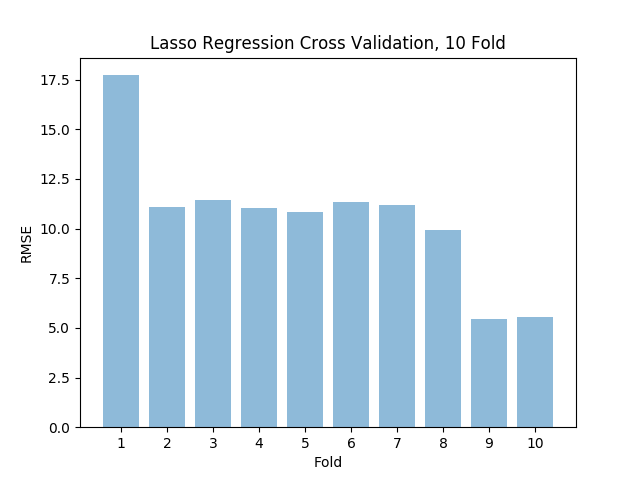

In [131]:
objects = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)
y_pos = np.arange(len(objects))
performance = rmse
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('RMSE')
plt.xlabel('Fold')
plt.title('Lasso Regression Cross Validation, 10 Fold')
 
plt.show()